In [1]:
!pip install emoji
!pip install Sastrawi
!pip install gensim
!pip3 install swifter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip install -U deep-translator

Defaulting to user installation because normal site-packages is not writeable


In [4]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install emoji --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [8]:
import nltk
from nltk.tokenize import word_tokenize


# UNCOMMENT "nltk.download()" untuk  pertamakali run, untuk run selanjutnya comment kembali
# nltk.download() 

In [9]:
import pandas as pd 
import numpy as np
import re
import string
# import emoji

# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

import swifter

from tqdm import tqdm 

# from nltk.tokenize import word_tokenize
# import nltk
# nltk.download()

import ast 

import gensim
from gensim import corpora, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
from deep_translator import GoogleTranslator

In [21]:
dfc = pd.read_csv("youtube-comments (5).csv");

In [22]:
dfc.head()


,publishedAt,authorDisplayName,textDisplay,likeCount
0,2023-11-04T02:02:00Z,umi kaimana,Mas Gibran pria mudah <br>Adalah generasi pene...,0.0
1,2023-11-03T23:17:05Z,Laode Handi,Prediksi saya Prabowo Gibran menang diatas 50 ...,0.0
2,2023-11-03T22:39:48Z,Aris Santoso,Gibran kucluk gayane koyo baim wong......,0.0
3,2023-11-03T15:35:49Z,AWU,Semenjak kalah terus jadi menhan jadi kaga res...,0.0
4,2023-11-03T14:33:52Z,Gogolali Kroto,Mantap kali... Pak Prabowo dan Mas Gibran 🎉❤🇮🇩,0.0


In [23]:
dfc['textDisplay'][0]

'Mas Gibran pria mudah <br>Adalah generasi penerus<br>Yg mementingkan kepetingan<br>Golongan dripd kepentingan pribadi...mas Gibran maju terus...'

In [24]:
dfc

,publishedAt,authorDisplayName,textDisplay,likeCount
0,2023-11-04T02:02:00Z,umi kaimana,Mas Gibran pria mudah <br>Adalah generasi pene...,0.0
1,2023-11-03T23:17:05Z,Laode Handi,Prediksi saya Prabowo Gibran menang diatas 50 ...,0.0
2,2023-11-03T22:39:48Z,Aris Santoso,Gibran kucluk gayane koyo baim wong......,0.0
3,2023-11-03T15:35:49Z,AWU,Semenjak kalah terus jadi menhan jadi kaga res...,0.0
4,2023-11-03T14:33:52Z,Gogolali Kroto,Mantap kali... Pak Prabowo dan Mas Gibran 🎉❤🇮🇩,0.0
5,2023-11-03T14:16:19Z,G Hasibuan,Kenapa pada protes ya.....bila perlu syaratnya...,0.0
6,2023-11-03T14:13:30Z,G Hasibuan,Katanya negara demokrasi.....siapa aja yg masu...,0.0
7,2023-11-03T09:53:26Z,Sahmal Bebie,Demokrasi Indonesia mati,0.0
8,2023-11-03T07:41:13Z,Mian Siahaan,Ganjar aja deh,0.0
9,2023-11-03T07:39:50Z,Mian Siahaan,Katanya ngk bisa. Batas usia. Mana yg benar ia ??,1.0


In [25]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publishedAt        53 non-null     object 
 1   authorDisplayName  53 non-null     object 
 2   textDisplay        52 non-null     object 
 3   likeCount          51 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.8+ KB


In [26]:
# hapus data nan
df_cleaned = dfc.dropna()

In [27]:
for tweet in tqdm(df_cleaned['textDisplay']):
    print(tweet)
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 50689.46it/s]

Mas Gibran pria mudah <br>Adalah generasi penerus<br>Yg mementingkan kepetingan<br>Golongan dripd kepentingan pribadi...mas Gibran maju terus...
Prediksi saya Prabowo Gibran menang diatas 50 persen dgn alasan, pemilih   Prabowo,pemilih SBY, relawan Gibran, mesin koalsi indo majukeluarga Soeharto,Kel purnawirawan,Kel yg diberi bea siswa dll
Gibran kucluk gayane koyo baim wong......
Semenjak kalah terus jadi menhan jadi kaga resep udah <br>Mending anies lah
Mantap kali...  Pak Prabowo dan Mas Gibran 🎉❤🇮🇩
Kenapa pada protes ya.....bila perlu syaratnya usia 20 tahun...........kalaupun dia tidak kompeten ada rakyat bakal milih......kenapa pengen menang wo...
Katanya negara demokrasi.....siapa aja yg masuk jadi pencalonan....ya kenapa di permasalahkan.....toh juga rakyat yg milih.......
Demokrasi Indonesia mati
Ganjar aja deh
Katanya ngk bisa. Batas usia. Mana yg benar ia ??
Emng jd ???
tetep yakin Prabowo Gibran menang di putaran kedua
2024 untuk prabowo gibran
Usianya paling sepuh adalah p

In [28]:
clean_texts = []
token_texts = []
freq_words = []

# stopword
stop_factory = StopWordRemoverFactory().get_stop_words() #load defaul stopword
more_stopword = ['•',"stengah", "kopit", "china","g","yaaaaa","gengs","gada","dgn",
"nich","yg","padan", "juoro","nya","js","kl","","co","ga","lg","gw","jg","walu",
"grrabbpoodd","klo","jeben","makane","kakean","sek","mb","skp","tpi","bgt","lgi",
"lu","rb","rban","mura","pd","nih","lii","enel","dr","exo","ipo","trus","d","shm",
"skrg","byk","mang","ots","dah""dg","bp","n","arsjadrasjid","mmc"] #menambahkan stopword
data_stopword = stop_factory + more_stopword #menggabungkan stopword

for tweet in tqdm(df_cleaned['textDisplay']):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = re.sub(r"\d+", "", tweet) # Remove number
#     tweet = ''.join(c for c in tweet if c not in emoji.EMOJI_DATA) #Remove Emojis
    tweet = tweet.replace('"','') #remove quotation mark
    tweet = tweet.lower() #Lower Case
    tweet = tweet.strip() # Remove Whitespace
    tweet = tweet.translate(str.maketrans("","",string.punctuation)) #Remove Punctuation 
 
    dictionary = ArrayDictionary(data_stopword)
    swr = StopWordRemover(dictionary)
    tweet = swr.remove(tweet)
    
    #Tokenization
    tokens = nltk.tokenize.word_tokenize(tweet)
    tweet = " ".join(tokens) #Disatukan Kembali
    
    freq_words.append(nltk.FreqDist(word_tokenize(tweet)))
    
    token_texts.append(tokens)
    clean_texts.append(tweet)
df_cleaned['clear'] = clean_texts
df_cleaned['token_texts'] = token_texts
df_cleaned['freq_words'] = freq_words

all_freq_words = nltk.FreqDist(sum(df_cleaned['clear'].map(word_tokenize), []))

df_cleaned

100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 2540.22it/s]
C:\Users\ICHSAM\AppData\Local\Temp\ipykernel_12764\565270061.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clear'] = clean_texts
C:\Users\ICHSAM\AppData\Local\Temp\ipykernel_12764\565270061.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['token_texts'] = token_texts
C:\Users\ICHSAM\AppData\Local\Temp\ipykernel_12764\565270061.py:39: SettingWithCopyWarning

,publishedAt,authorDisplayName,textDisplay,likeCount,clear,token_texts,freq_words
0,2023-11-04T02:02:00Z,umi kaimana,Mas Gibran pria mudah <br>Adalah generasi pene...,0.0,mas gibran pria mudah bradalah generasi peneru...,"[mas, gibran, pria, mudah, bradalah, generasi,...","{'mas': 1, 'gibran': 2, 'pria': 1, 'mudah': 1,..."
1,2023-11-03T23:17:05Z,Laode Handi,Prediksi saya Prabowo Gibran menang diatas 50 ...,0.0,prediksi prabowo gibran menang diatas persen a...,"[prediksi, prabowo, gibran, menang, diatas, pe...","{'prediksi': 1, 'prabowo': 1, 'gibran': 2, 'me..."
2,2023-11-03T22:39:48Z,Aris Santoso,Gibran kucluk gayane koyo baim wong......,0.0,gibran kucluk gayane koyo baim wong,"[gibran, kucluk, gayane, koyo, baim, wong]","{'gibran': 1, 'kucluk': 1, 'gayane': 1, 'koyo'..."
3,2023-11-03T15:35:49Z,AWU,Semenjak kalah terus jadi menhan jadi kaga res...,0.0,semenjak kalah terus jadi menhan jadi kaga res...,"[semenjak, kalah, terus, jadi, menhan, jadi, k...","{'semenjak': 1, 'kalah': 1, 'terus': 1, 'jadi'..."
4,2023-11-03T14:33:52Z,Gogolali Kroto,Mantap kali... Pak Prabowo dan Mas Gibran 🎉❤🇮🇩,0.0,mantap kali pak prabowo mas gibran 🎉❤🇮🇩,"[mantap, kali, pak, prabowo, mas, gibran, 🎉❤🇮🇩]","{'mantap': 1, 'kali': 1, 'pak': 1, 'prabowo': ..."
5,2023-11-03T14:16:19Z,G Hasibuan,Kenapa pada protes ya.....bila perlu syaratnya...,0.0,pada protes yabila perlu syaratnya usia tahunk...,"[pada, protes, yabila, perlu, syaratnya, usia,...","{'pada': 1, 'protes': 1, 'yabila': 1, 'perlu':..."
6,2023-11-03T14:13:30Z,G Hasibuan,Katanya negara demokrasi.....siapa aja yg masu...,0.0,katanya negara demokrasisiapa aja masuk jadi p...,"[katanya, negara, demokrasisiapa, aja, masuk, ...","{'katanya': 1, 'negara': 1, 'demokrasisiapa': ..."
7,2023-11-03T09:53:26Z,Sahmal Bebie,Demokrasi Indonesia mati,0.0,demokrasi indonesia mati,"[demokrasi, indonesia, mati]","{'demokrasi': 1, 'indonesia': 1, 'mati': 1}"
8,2023-11-03T07:41:13Z,Mian Siahaan,Ganjar aja deh,0.0,ganjar aja deh,"[ganjar, aja, deh]","{'ganjar': 1, 'aja': 1, 'deh': 1}"
9,2023-11-03T07:39:50Z,Mian Siahaan,Katanya ngk bisa. Batas usia. Mana yg benar ia ??,1.0,katanya ngk batas usia mana benar,"[katanya, ngk, batas, usia, mana, benar]","{'katanya': 1, 'ngk': 1, 'batas': 1, 'usia': 1..."


In [29]:
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_cleaned['token_texts']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df_cleaned['stemmed_texts'] = df_cleaned['token_texts'].swifter.apply(get_stemmed_term)
print(df_cleaned['stemmed_texts'])

281
------------------------
mas : mas
gibran : gibran
pria : pria
mudah : mudah
bradalah : bradalah
generasi : generasi
penerusbryg : penerusbryg
mementingkan : penting
kepetinganbrgolongan : kepetinganbrgolongan
dripd : dripd
kepentingan : penting
pribadimas : pribadimas
maju : maju
terus : terus
prediksi : prediksi
prabowo : prabowo
menang : menang
diatas : atas
persen : persen
alasan : alas
pemilih : pilih
prabowopemilih : prabowopemilih
sby : sby
relawan : rawan
mesin : mesin
koalsi : koalsi
indo : indo
majukeluarga : majukeluarga
soehartokel : soehartokel
purnawirawankel : purnawirawankel
diberi : beri
bea : bea
siswa : siswa
kucluk : kucluk
gayane : gayane
koyo : koyo
baim : baim
wong : wong
semenjak : semenjak
kalah : kalah
jadi : jadi
menhan : menhan
kaga : kaga
resep : resep
udah : udah
brmending : brmending
anies : anies
lah : lah
mantap : mantap
kali : kali
pak : pak
🎉❤🇮🇩 : 
pada : pada
protes : protes
yabila : yabila
perlu : perlu
syaratnya : syarat
usia : usia
tahunkalaup

Pandas Apply:   0%|          | 0/51 [00:00<?, ?it/s]

0     [mas, gibran, pria, mudah, bradalah, generasi,...
1     [prediksi, prabowo, gibran, menang, atas, pers...
2            [gibran, kucluk, gayane, koyo, baim, wong]
3     [semenjak, kalah, terus, jadi, menhan, jadi, k...
4           [mantap, kali, pak, prabowo, mas, gibran, ]
5     [pada, protes, yabila, perlu, syarat, usia, ta...
6     [kata, negara, demokrasisiapa, aja, masuk, jad...
7                          [demokrasi, indonesia, mati]
8                                    [ganjar, aja, deh]
9                 [kata, ngk, batas, usia, mana, benar]
10                                           [emng, jd]
11    [tetep, yakin, prabowo, gibran, menang, putar,...
12                                    [prabowo, gibran]
13                         [usia, paling, sepuh, pilih]
14        [ganjarmahfud, bos, ora, sudi, pilih, gibran]
15    [rakyat, benerquot, jijik, dg, cara, jadi, caw...
16             [makanya, mending, coblos, prabowo, aja]
17        [prabowo, gibran, gugur, udah, ingkar,

C:\Users\ICHSAM\AppData\Local\Temp\ipykernel_12764\2283960126.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['stemmed_texts'] = df_cleaned['token_texts'].swifter.apply(get_stemmed_term)


In [30]:
FreqWord = pd.DataFrame(all_freq_words.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)


In [31]:
FreqWord

,word,frequency
1,gibran,18
15,prabowo,13
40,jadi,7
122,gak,5
50,pak,5
...,...,...
110,gk,1
111,slamanya,1
112,prabowogibran,1
113,tetap,1


In [32]:
dfc.shape
dfc.isnull().sum()
dfc['clear'].isnull().sum()
df_final = dfc.drop(dfc[dfc.clear == ''].index)
dfc["clear"].duplicated().sum()
df_final.drop_duplicates(subset='clear',inplace=True)
df_final.shape

KeyError: 'clear'

In [ ]:
df_final = df_cleaned.copy()

In [ ]:
df_cleaned.shape

In [ ]:
df_cleaned.isnull().sum()

In [ ]:
df_cleaned['clear'].isnull().sum()

In [ ]:
df_final = df_cleaned.drop(df_cleaned[df_cleaned.clear == ''].index)

In [ ]:
df_cleaned["clear"].duplicated().sum()

In [ ]:
df_final.drop_duplicates(subset='clear',inplace=True)

In [ ]:
df_cleaned.shape

In [ ]:
from textblob import TextBlob

In [ ]:
translate_texts = []
label_texts = []
polarity_text = []
subjectivity_texts = []
scores=[]
for comment in tqdm(df_final['clear']):
    blob = TextBlob(comment)

    # Menerjemahkan teks ke Bahasa Inggris
#     terjemahan_inggris = blob.translate(from_lang='id', to='en')
    
    terjemahan_inggris=GoogleTranslator(source='auto', target='en').translate(comment)
    terjemahan_inggris=TextBlob(terjemahan_inggris)
    
    # Melakukan analisis sentimen
    sentimen = terjemahan_inggris.sentiment
    
    # Mendapatkan nilai sentimen
    polarity = sentimen.polarity  # Nilai antara -1 hingga 1 (positif hingga negatif)
    subjectivity = sentimen.subjectivity  # Nilai antara 0 hingga 1 (faktual hingga subjektif)

    # Menampilkan hasil analisis sentimen
    if polarity > 0:
        sentiment_label = "Positif"
        score=1
    elif polarity < 0:
        sentiment_label = "Negatif"
        score=-1
    else:
        sentiment_label = "Netral"
        score=0

#     print("Teks:", terjemahan_inggris.string)
    scores.append(score)
    label_texts.append(sentiment_label)
    polarity_text.append(polarity)
    translate_texts.append(terjemahan_inggris.string)
    subjectivity_texts.append(subjectivity)
    


In [ ]:
df_final['label']=label_texts
df_final['score']=scores
df_final['translate']=translate_texts
df_final['polarity']=polarity_text
df_final['subjectivity']=subjectivity_texts
    

In [35]:
df_final

NameError: name 'df_final' is not defined

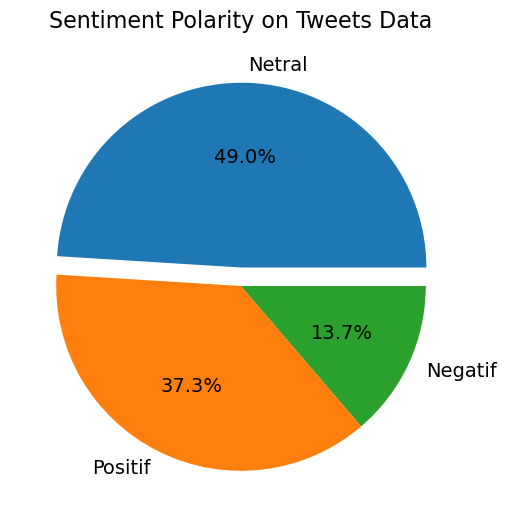

In [150]:
# fisualisasi

fig, ax = plt.subplots(figsize = (6, 6))
sizes = [count for count in df_final['label'].value_counts()]
labels = list(df_final['label'].value_counts().index)
explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct = '%1.1f%%', explode = explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Tweets Data', fontsize = 16, pad = 20)
plt.show()

In [153]:
pd.set_option('display.max_colwidth', 3000)
positive_comments = df_final[df_final['label'] == 'Positif']
positive_comments = positive_comments[['clear', 'polarity', 'label','translate']].sort_values(by = 'polarity', ascending=False).reset_index(drop = True)
positive_comments.index += 1
positive_comments[0:10]


,clear,polarity,label,translate
1,mantap kali pak prabowo mas gibran 🎉❤🇮🇩,0.800000,Positif,"Great sir Prabowo, Mas Gibran 🎉❤🇮🇩"
2,cawapres aja bangga pilih dunk prabowo capres,0.800000,Positif,Even the vice presidential candidate is proud to choose Dunk Prabowo as presidential candidate
3,makanya mending coblos prabowo aja,0.500000,Positif,So it's better to just vote for Prabowo
4,harusnya prabowo aniestapi kalau begini mending anies cak imin,0.500000,Positif,"Prabowo should be Anies, but if it's like this, it's better if Anies Cak Imin"
5,tim pemenangan prabowobraldi taher kiki kaesang cakil fadli zonk fahri hamzah roki gerung rizal ramli 😂,0.500000,Positif,prabowobraldi winning team taher kiki kaesang cakil fadli zonk fahri hamzah roki gerung rizal ramli 😂
6,lanjutkan kedunguan kalian komentar gibahnyinyir hujatbohong amp fitnah mmg kalian paling hebat paling baik paling suksestapi boong🤣tapi dungu🤣,0.490000,Positif,"continue your stupid comments, gibah, blasphemy and slander, you are the greatest, the best, the most successful, but you are lying🤣but you are stupid🤣"
7,katanya ngk batas usia mana benar,0.350000,Positif,"he said there is no age limit, which is true"
8,emang klw wakilnya gibran,0.350000,Positif,It's true that Gibran's deputy
9,iya bener,0.285714,Positif,"Yes, right"
10,tetep yakin prabowo gibran menang putaran kedua,0.275000,Positif,Still confident that Prabowo Gibran will win the second round


In [154]:
pd.set_option('display.max_colwidth', 3000)
positive_comments = df_final[df_final['label'] == 'Negatif']
positive_comments = positive_comments[['clear', 'polarity', 'label','translate']].sort_values(by = 'polarity', ascending=False).reset_index(drop = True)
positive_comments.index += 1
positive_comments[0:10]


,clear,polarity,label,translate
1,ogah bngt pilih cawapres karbitan paksa 😊,-0.05,Negatif,I really don't want to choose a forced presidential candidate 😊
2,demokrasi indonesia mati,-0.20,Negatif,Indonesian democracy is dead
3,pilih kelompok durhaka amin rais cak imin roki gerung tu semua orang pembawa kesialan capres didukungnya selalu keok nyungsep 🤣,-0.40,Negatif,vote for the disobedient group amen rais cak imin roki gerung that's all the people who bring bad luck the presidential candidate he supports always loses his shit 🤣
4,kasian ganjar kalo gak pdip🤣 kasian anies kalo gak nasdem🤣 petugas partai🤣jadi siapa ngatur negara rakyatnya ketua partailah prabowo ketua partai gak yg bs mendikte,-0.40,Negatif,"poor punishment if you don't pdip🤣 poor anies if you don't nasdem🤣 party officials🤣so who rules the country the people are the party chairman, prabowo, isn't the party chairman the one who can dictate"
5,semoga gagal selalu mendukung pak prabowo setelah tau gibran huh ogah pak pak nya jangan gibran lah wakilnya,-0.50,Negatif,"I hope you fail to always support Pak Prabowo after finding out about Gibran, huh, don't give up, sir, don't give up on Gibran, be your deputy."
6,santai casual jos❤,-0.50,Negatif,relax casual jos❤
7,rakyat benerquot jijik dg caranya jadi cawapres,-1.00,Negatif,The people are really disgusted with the way he became vice presidential candidate


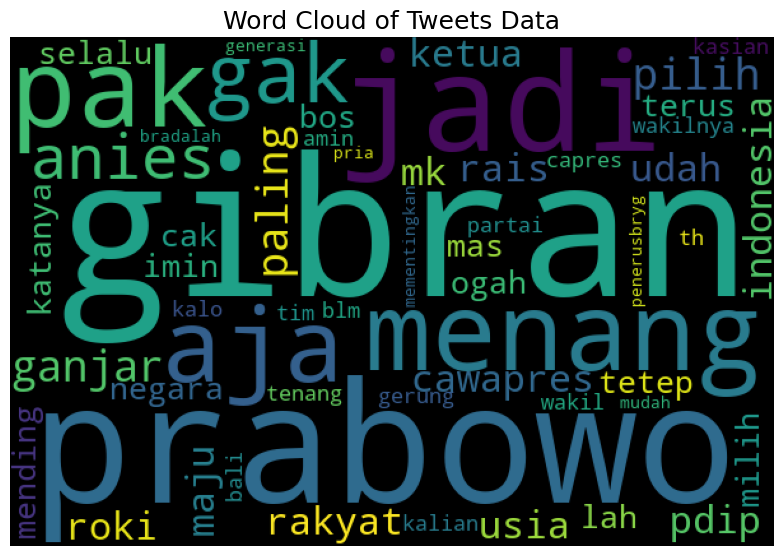

In [156]:
# Visualize word cloud

list_words=''
for tweet in df_final['token_texts']:
    for word in tweet:
        list_words += ' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'black', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize = 18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

In [157]:
tokens = nltk.tokenize.word_tokenize(list_words)
fdist=nltk.FreqDist(tokens)
fdist

FreqDist({'gibran': 18, 'prabowo': 13, 'jadi': 7, 'menang': 5, 'pak': 5, 'aja': 5, 'gak': 5, 'anies': 4, 'ganjar': 4, 'paling': 4, ...})